## importing libraries

In [642]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import dataset

In [643]:
df = pd.read_csv("kc_house_data.csv" , nrows=20000)
display(df.head(3))
nrows , ncolumns = df.shape
print(f"our dataframe has {nrows} rows and {ncolumns} columns ")

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   

   sqft_lot15  
0        5650  
1        7639  
2        8062  

[3 rows x 21 columns]

our dataframe has 20000 rows and 21 columns 


## correlation

In [644]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

/tmp/ipykernel_1761/1781599262.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


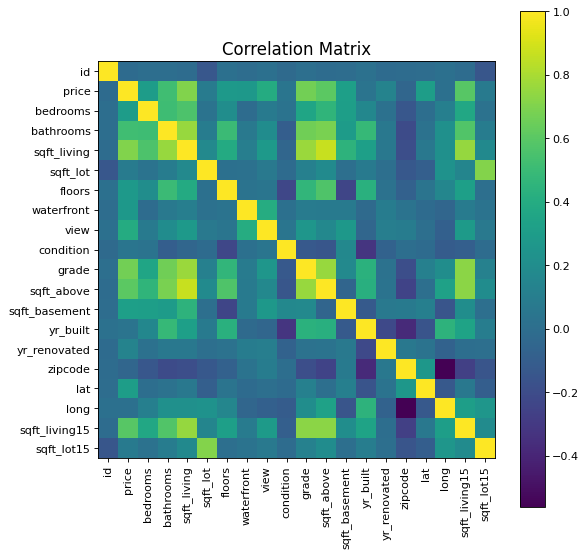

In [645]:
plotCorrelationMatrix(df, 8)

In [646]:
print(df.corr())

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.014968  0.001319   0.002896    -0.013115 -0.136244   
price         -0.014968  1.000000  0.302262   0.523939     0.701237  0.085830   
bedrooms       0.001319  0.302262  1.000000   0.517139     0.566322  0.029946   
bathrooms      0.002896  0.523939  0.517139   1.000000     0.760377  0.092251   
sqft_living   -0.013115  0.701237  0.566322   0.760377     1.000000  0.171386   
sqft_lot      -0.136244  0.085830  0.029946   0.092251     0.171386  1.000000   
floors         0.016064  0.278863  0.201525   0.503112     0.391932  0.015858   
waterfront    -0.002530  0.268705 -0.007204   0.067608     0.107383  0.021823   
view           0.013126  0.400164  0.077548   0.195108     0.285543  0.069355   
condition     -0.022228  0.047331  0.035334  -0.095474    -0.045958 -0.017097   
grade          0.007036  0.665403  0.354602   0.660382     0.766485  0.117625   
sqft_above    -0.013140  0.6

In [697]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
19995    279000.0
19996    380000.0
19997    287000.0
19998    377000.0
19999    649950.0
Name: price, Length: 19991, dtype: float64

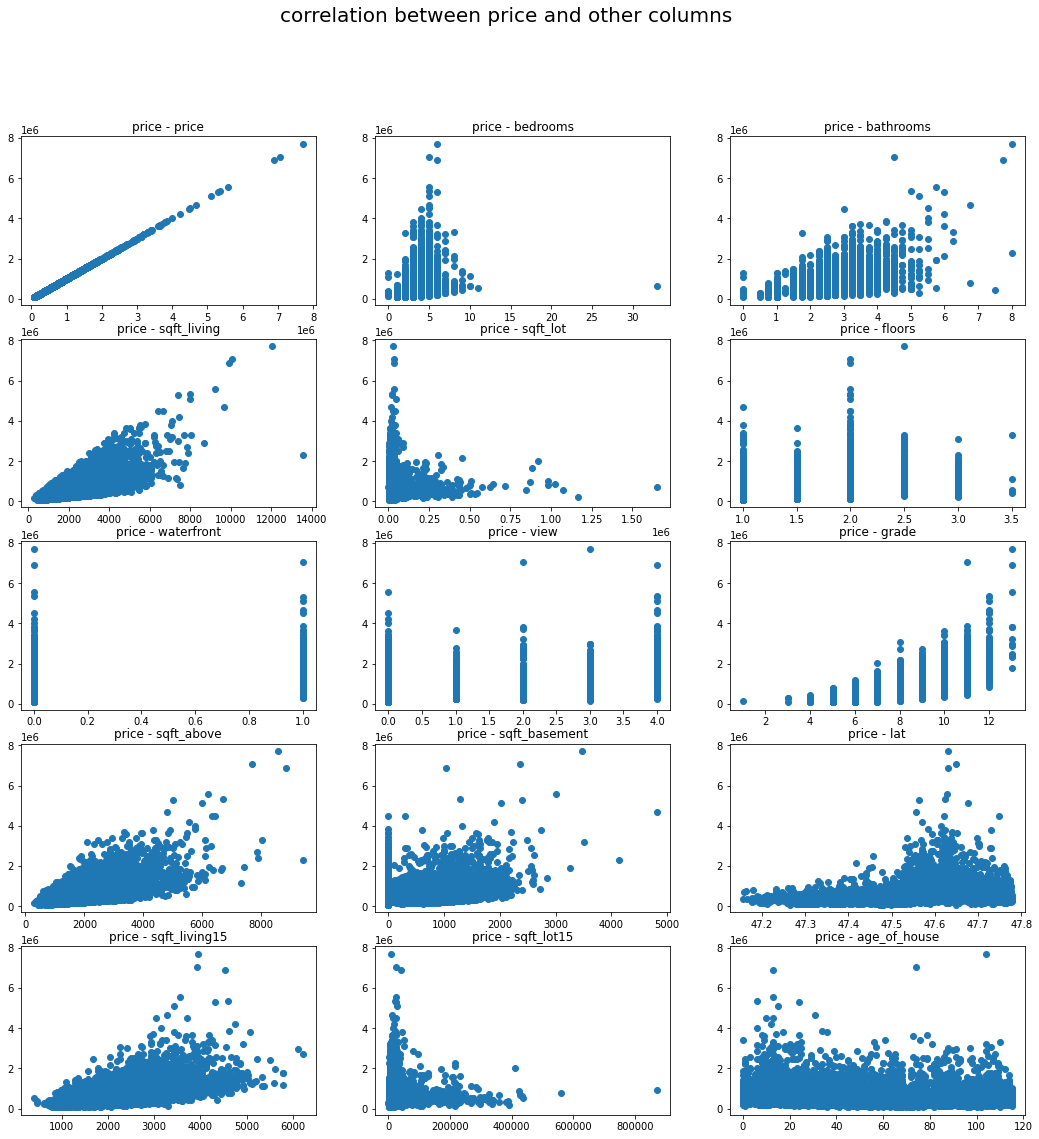

In [756]:
fig , axs = plt.subplots(5 , 3 ,figsize = (18 , 18))
fig.suptitle("correlation between price and other columns" , fontsize = 20)
counter = 0 
for i in range(5):
    for j in range(3):
        for k in range(df.shape[1]):
            x = df.iloc[ :  , counter]
            y = df['price']
            axs[i][j].scatter( x , y )
            axs[i][j].set_title("price - " + df.columns[counter])         
            counter +=1
            break

## remove irrelevant columns

In [647]:
df = df.drop(columns=['id' , 'condition','zipcode'  , 'long'])

## work with date columns

In [648]:
import datetime
df["date"]= pd.to_datetime(df.date)
df.head(4)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   

   waterfront  view  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0           0     0      7        1180              0      1955             0   
1           0     0      7        2170            400      1951          1991   
2           0     0      6         770              0      1933             0   
3           0     0      7        1050            910      1965             0   

       lat  sqft_living15  sqft_lot15  
0  47.5112           1340        5650  
1  47.7210           1690        7639  
2  47.7379           2720        8062  
3  47.5208           1360        5000

In [649]:
age_of_house = [df["date"][index].year-df['yr_built'][index] for index in range(df.shape[0])]   
df['age_of_house'] = age_of_house
display(df.describe().T)
print("#############################################")
# we see that min of age of house is -1 .
df[df.age_of_house<0]

count           mean            std         min  \
price          20000.0  535473.747950  365948.372920  75000.0000   
bedrooms       20000.0       3.364450       0.933740      0.0000   
bathrooms      20000.0       2.072013       0.762412      0.0000   
sqft_living    20000.0    2057.907000     905.625430    290.0000   
sqft_lot       20000.0   15606.366650   41770.244376    520.0000   
floors         20000.0       1.444950       0.516776      1.0000   
waterfront     20000.0       0.007950       0.088810      0.0000   
view           20000.0       0.241800       0.777922      0.0000   
grade          20000.0       7.605750       1.172598      1.0000   
sqft_above     20000.0    1757.472700     811.606980    290.0000   
sqft_basement  20000.0     300.434300     447.618770      0.0000   
yr_built       20000.0    1967.956500      28.317996   1900.0000   
yr_renovated   20000.0      90.807500     415.937997      0.0000   
lat            20000.0      47.560390       0.139320     47.1559   
sqft_living15  20000.0    1974.286850     675.242028    399.0000   
sqft_lot15     20000.0   13115.936600   26942.695517    651.0000   
age_of_house   20000.0      46.365600      28.320774     -1.0000   

                        25%           50%         75%           max  
price          317000.00000  449950.00000  640000.000  7.700000e+06  
bedrooms            3.00000       3.00000       4.000  3.300000e+01  
bathrooms           1.50000       2.00000       2.500  8.000000e+00  
sqft_living      1420.00000    1900.00000    2510.000  1.354000e+04  
sqft_lot         5350.00000    7819.00000   11000.000  1.651359e+06  
floors              1.00000       1.00000       2.000  3.500000e+00  
waterfront          0.00000       0.00000       0.000  1.000000e+00  
view                0.00000       0.00000       0.000  4.000000e+00  
grade               7.00000       7.00000       8.000  1.300000e+01  
sqft_above       1180.00000    1540.00000    2150.000  9.410000e+03  
sqft_basement       0.00000       0.00000     590.000  4.820000e+03  
yr_built         1950.00000    1969.00000    1991.000  2.015000e+03  
yr_renovated        0.00000       0.00000       0.000  2.015000e+03  
lat                47.46755      47.57295      47.679  4.777760e+01  
sqft_living15    1490.00000    1830.00000    2337.000  6.210000e+03  
sqft_lot15       5347.75000    7778.50000   10240.000  8.712000e+05  
age_of_house       23.00000      45.00000      65.000  1.150000e+02

#############################################


date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1763  2014-06-25  597326.0         4       4.00         3570      8250   
2687  2014-10-29  385195.0         1       1.00          710      6000   
7526  2014-12-31  614285.0         5       2.75         2730      6401   
8039  2014-06-24  455000.0         2       1.50         1200      1259   
14489 2014-08-26  500000.0         2       2.25         1570      1269   
17098 2014-06-17  350000.0         3       2.00         1380      3600   
19805 2014-08-01  455000.0         3       1.75         1320      1014   

       floors  waterfront  view  grade  sqft_above  sqft_basement  yr_built  \
1763      2.0           0     0     10        2860            710      2015   
2687      1.5           0     0      6         710              0      2015   
7526      2.0           0     0      8        2730              0      2015   
8039      2.0           0     0      8        1000            200      2015   
14489     2.0           0     0      9        1280            290      2015   
17098     3.0           0     0      8        1380              0      2015   
19805     3.0           0     0      9        1320              0      2015   

       yr_renovated      lat  sqft_living15  sqft_lot15  age_of_house  
1763              0  47.5784           2230       10000            -1  
2687              0  47.5756           1440        4800            -1  
7526              0  47.7685           2520        6126            -1  
8039              0  47.6001           1320        1852            -1  
14489             0  47.6514           1570        6000            -1  
17098             0  47.6074           1480        3600            -1  
19805             0  47.6047           1380        1495            -1

In [650]:
# drop above rows
df.drop(df[df.age_of_house < 0].index , inplace =True)

In [651]:
# now , drop the yr_built and date columns
df.drop(columns=['date' , 'yr_built' ] , inplace=True)


In [652]:
# we have another columns that names yr_renovated
# lets see this correlation 
print(f"the correlation between renovated column and price of house is  : {df['yr_renovated'].corr(df['price'])}")     
# so there is a week correlation 
(df.yr_renovated.value_counts(normalize=True)*100).head()
# so there is around 95% of value of yr_renovates column is zero
# now drop the yr_renovate column 
df.drop(columns=['yr_renovated'] , inplace=True)

the correlation between renovated column and price of house is  : 0.13561736856296255


## duplicates

In [653]:
df.drop_duplicates(inplace=True)

## nan values

In [654]:
print(df.isna().sum())
print("#####################")
# the isna and isnull methods both have same function 

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
lat              0
sqft_living15    0
sqft_lot15       0
age_of_house     0
dtype: int64
#####################


## set dataset

In [655]:
df
features = df.drop(['price'] , axis=1)
display(features)
target = df['price']
features = np.asarray(features)
target = np.asarray(target)
target.reshape(-1 , 1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
19995         5       2.50         2690      5557     2.0           0     0   
19996         3       2.25         1530      1305     2.0           0     0   
19997         3       2.50         1600      6315     2.0           0     0   
19998         2       1.50         1000      1251     2.0           0     0   
19999         4       3.50         2440      3012     3.0           0     1   

       grade  sqft_above  sqft_basement      lat  sqft_living15  sqft_lot15  \
0          7        1180              0  47.5112           1340        5650   
1          7        2170            400  47.7210           1690        7639   
2          6         770              0  47.7379           2720        8062   
3          7        1050            910  47.5208           1360        5000   
4          8        1680              0  47.6168           1800        7503   
...      ...         ...            ...      ...            ...         ...   
19995      7        2690              0  47.4914           2090       10500   
19996      7        1116            414  47.7034           1320        1427   
19997      8        1600              0  47.2611           1608        4300   
19998      7         930             70  47.6529           1420        1187   
19999      8        2440              0  47.6923           1860        4650   

       age_of_house  
0                59  
1                63  
2                82  
3                49  
4                28  
...             ...  
19995             2  
19996             8  
19997             1  
19998             8  
19999            10  

[19991 rows x 14 columns]

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [287000.],
       [377000.],
       [649950.]])

## Train-Test-split

In [656]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(features , target , train_size=0.8 ,shuffle=True , random_state=7 )    

In [657]:
y_train = y_train.reshape(-1 , 1)
y_test = y_test.reshape(-1 , 1)

## feature scaling

In [658]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
# x_train = ssc.fit_transform(x_train)
# x_test= ssc.fit_transform(x_test)
y_train = ssc.fit_transform(y_train)
y_test= ssc.fit_transform(y_test)

## multiple linear regression

In [659]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression()

In [660]:
y_pred = regressor.predict(x_test)

## Evaluation

In [661]:
from sklearn.metrics import r2_score
print("the r2_score of multiple linear regression is : " , r2_score(y_test , y_pred))

the r2_score of multiple linear regression is :  0.7065394610968618
